In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\johi\.cache\kagglehub\datasets\adilshamim8\student-depression-dataset\versions\1


In [21]:
# Instalar librerías si no están instaladas
%pip install scipy scikit-learn plotly

# Importar librerías estándar
import re
import math
import os
import warnings

# Importar librerías para manipulación de datos y análisis
import numpy as np
import pandas as pd
import scipy.stats as stats

# Importar librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importar librerías de Kaggle para manejo de datos
import kagglehub

# Importar librerías de Scikit-learn para machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score

# Configurar el entorno de visualización y advertencias
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
# Descarga el dataset a una carpeta local y nos da la ruta
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

# Construye la ruta completa al archivo CSV
full_csv_path = os.path.join(path, os.listdir(path)[0])

# Carga el archivo CSV usando la ruta local
data = pd.read_csv(full_csv_path)

# Muestra las primeras filas para confirmar la carga
print("Datos cargados en un entorno local:")
data.head()

Datos cargados en un entorno local:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


Limpieza de datos

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [24]:
#Convertir columnas a Category
data['Gender'] = data['Gender'].astype('category')
data['City'] = data['City'].astype('category')
data['Sleep Duration'] = data['Sleep Duration'].astype('category')
data['Dietary Habits'] = data['Dietary Habits'].astype('category')
data['Degree'] = data['Degree'].astype('category')
data['Have you ever had suicidal thoughts ?'] = data['Have you ever had suicidal thoughts ?'].astype('category')
data['Family History of Mental Illness'] = data['Family History of Mental Illness'].astype('category')
data['Depression'] = data['Depression'].astype('category')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27901 non-null  int64   
 1   Gender                                 27901 non-null  category
 2   Age                                    27901 non-null  float64 
 3   City                                   27901 non-null  category
 4   Profession                             27901 non-null  object  
 5   Academic Pressure                      27901 non-null  float64 
 6   Work Pressure                          27901 non-null  float64 
 7   CGPA                                   27901 non-null  float64 
 8   Study Satisfaction                     27901 non-null  float64 
 9   Job Satisfaction                       27901 non-null  float64 
 10  Sleep Duration                         27901 non-null  cat

In [26]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000


In [27]:
data.shape

(27901, 18)

Análisis Univariable

In [28]:
# Estadísticas de resumen para variables numéricas
print(data[['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Work/Study Hours']].describe())

# Distribución de frecuencia de variables categóricas
for column in ['Gender', 'Depression', 'Sleep Duration', 'Dietary Habits', 'Family History of Mental Illness']:
    print(f"\nDistribución de frecuencia de: {column}")
    print(data[column].value_counts())
    print("-" * 30)

                Age  Academic Pressure  Work Pressure          CGPA  \
count  27901.000000       27901.000000   27901.000000  27901.000000   
mean      25.822300           3.141214       0.000430      7.656104   
std        4.905687           1.381465       0.043992      1.470707   
min       18.000000           0.000000       0.000000      0.000000   
25%       21.000000           2.000000       0.000000      6.290000   
50%       25.000000           3.000000       0.000000      7.770000   
75%       30.000000           4.000000       0.000000      8.920000   
max       59.000000           5.000000       5.000000     10.000000   

       Work/Study Hours  
count      27901.000000  
mean           7.156984  
std            3.707642  
min            0.000000  
25%            4.000000  
50%            8.000000  
75%           10.000000  
max           12.000000  

Distribución de frecuencia de: Gender
Gender
Male      15547
Female    12354
Name: count, dtype: int64
----------------------

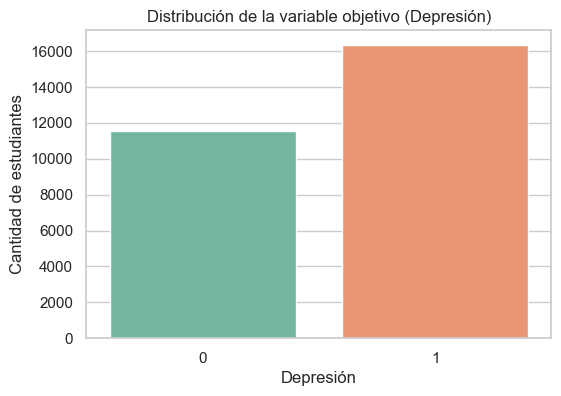

In [29]:
#Distribución de la variable objetivo
plt.figure(figsize=(6,4))
sns.countplot(x='Depression', data=data, palette='Set2')
plt.title('Distribución de la variable objetivo (Depresión)')
plt.xlabel('Depresión')
plt.ylabel('Cantidad de estudiantes')
plt.show()  

Análisis Multivariable

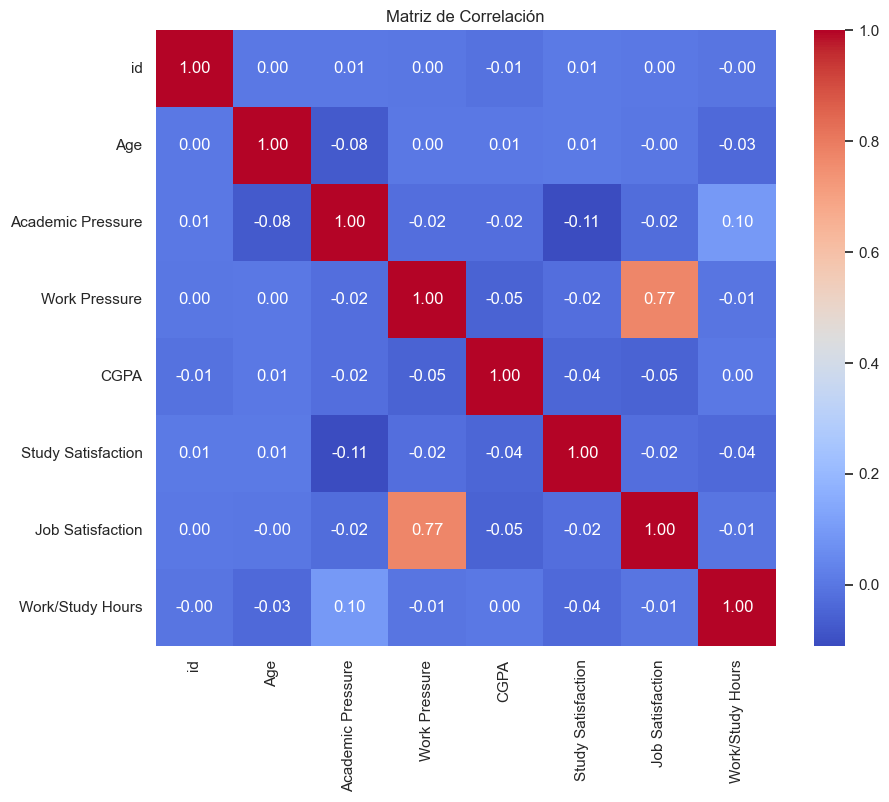

In [30]:
# Análisis de correlación para variables numéricas
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

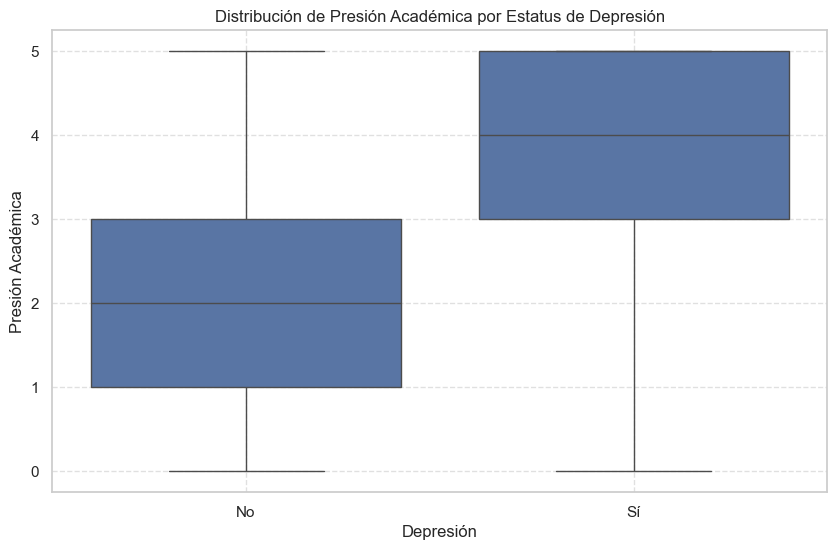

In [39]:
# Función para encontrar outliers

# Gráfico de la presión académica por depresión
plt.figure(figsize=(10, 6))
sns.boxplot(x='Depression', y='Academic Pressure', data=data)
plt.title('Distribución de Presión Académica por Estatus de Depresión')
plt.xlabel('Depresión')
plt.ylabel('Presión Académica')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [32]:
# Convert 'Depression' to integer (if not already)
data['Depression'] = data['Depression'].astype(int)

# Convert columns that should be categorical
cat_cols = ['Gender', 'City', 'Profession', 'Degree',
            'Have you ever had suicidal thoughts ?', 
            'Family History of Mental Illness']
for col in cat_cols:
    data[col] = data[col].astype('category')

# Check unique values in some columns to decide cleaning strategy
print("Unique values in 'Sleep Duration':", data['Sleep Duration'].unique())
print("Unique values in 'Financial Stress':", data['Financial Stress'].unique())

Unique values in 'Sleep Duration': [''5-6 hours'', ''Less than 5 hours'', ''7-8 hours'', ''More than 8 hours'', 'Others']
Categories (5, object): [''5-6 hours'', ''7-8 hours'', ''Less than 5 hours'', ''More than 8 hours'', 'Others']
Unique values in 'Financial Stress': ['1.0' '2.0' '5.0' '3.0' '4.0' '?']


   Sleep Duration Financial Stress
0             5.0              1.0
1             5.0              2.0
2             5.0              1.0
3             7.0              5.0
4             5.0              1.0


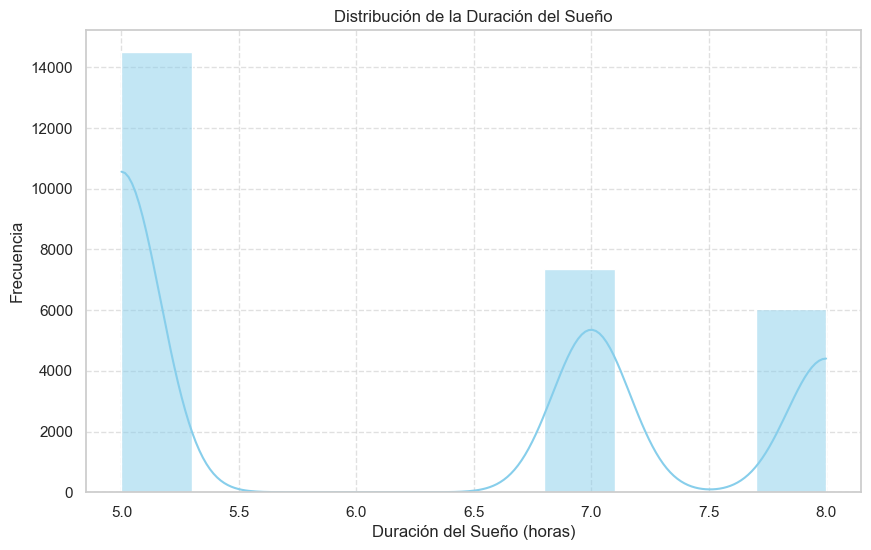

In [33]:
# Define a function to extract numeric hours from Sleep Duration column
def extract_hours(s):
    # Find a number (including decimals)
    match = re.search(r"(\d+(\.\d+)?)", str(s))
    return float(match.group(1)) if match else np.nan

data['Sleep Duration'] = data['Sleep Duration'].apply(extract_hours)

# Convert Financial Stress to categorical if it represents levels (e.g., Low, Medium, High)
data['Financial Stress'] = data['Financial Stress'].astype('category')

# Verify changes
print(data[['Sleep Duration', 'Financial Stress']].head())

# Create a histogram for Sleep Duration
plt.figure(figsize=(10, 6))
sns.histplot(data['Sleep Duration'].dropna(), bins=10, kde=True, color='skyblue')
plt.title('Distribución de la Duración del Sueño')
plt.xlabel('Duración del Sueño (horas)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

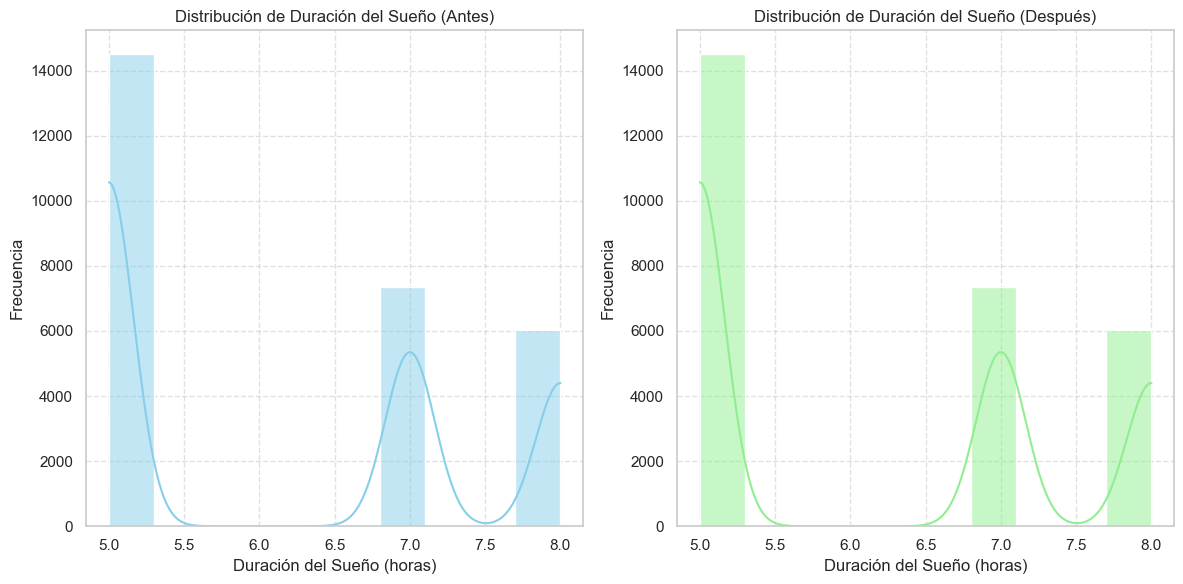

In [34]:
for col in ['Sleep Duration']:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)
# Crear una copia de la columna para la visualización 'antes'
sleep_duration_before = data['Sleep Duration'].copy()

# Imputar valores faltantes con la mediana
for col in ['Sleep Duration']:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

# Crear el gráfico para comparar las distribuciones
plt.figure(figsize=(12, 6))

# Subplot para la distribución 'antes' de la imputación
plt.subplot(1, 2, 1)
sns.histplot(sleep_duration_before.dropna(), bins=10, kde=True, color='skyblue')
plt.title('Distribución de Duración del Sueño (Antes)')
plt.xlabel('Duración del Sueño (horas)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot para la distribución 'después' de la imputación
plt.subplot(1, 2, 2)
sns.histplot(data['Sleep Duration'], bins=10, kde=True, color='lightgreen')
plt.title('Distribución de Duración del Sueño (Después)')
plt.xlabel('Duración del Sueño (horas)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

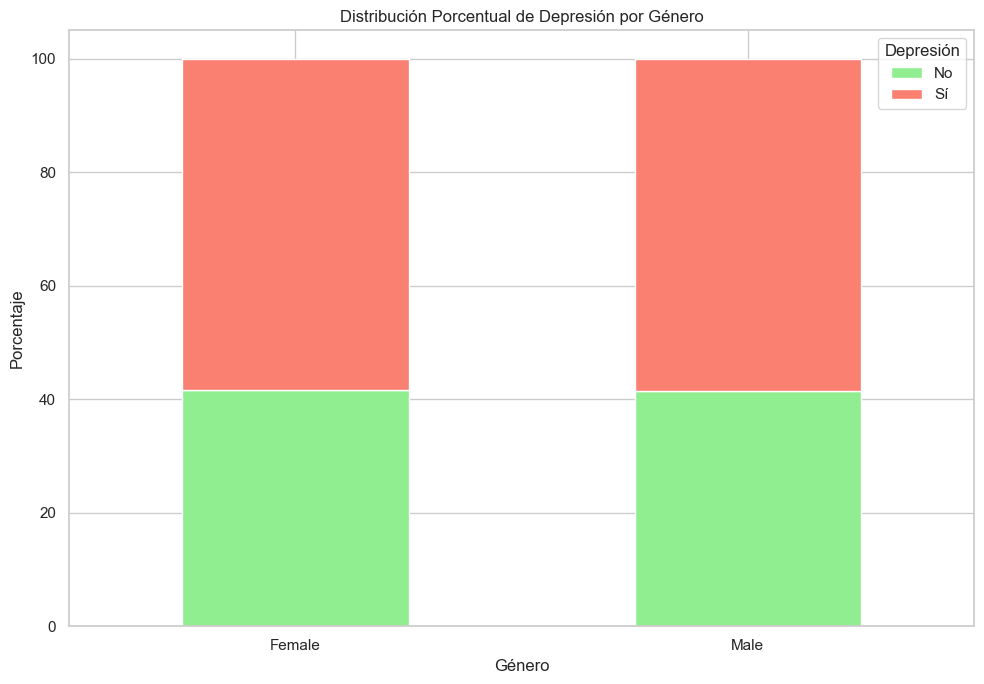

In [35]:
# Crea una tabla de contingencia normalizada para obtener porcentajes
gender_depression_prop = data.groupby('Gender')['Depression'].value_counts(normalize=True).unstack().mul(100)

# Genera un gráfico de barras apiladas a partir de la tabla
gender_depression_prop.plot(kind='bar', stacked=True, figsize=(10, 7), color=['lightgreen', 'salmon'])

# Añade etiquetas y título al gráfico
plt.title('Distribución Porcentual de Depresión por Género')
plt.xlabel('Género')
plt.ylabel('Porcentaje')
plt.xticks(rotation=0)
plt.legend(title='Depresión', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

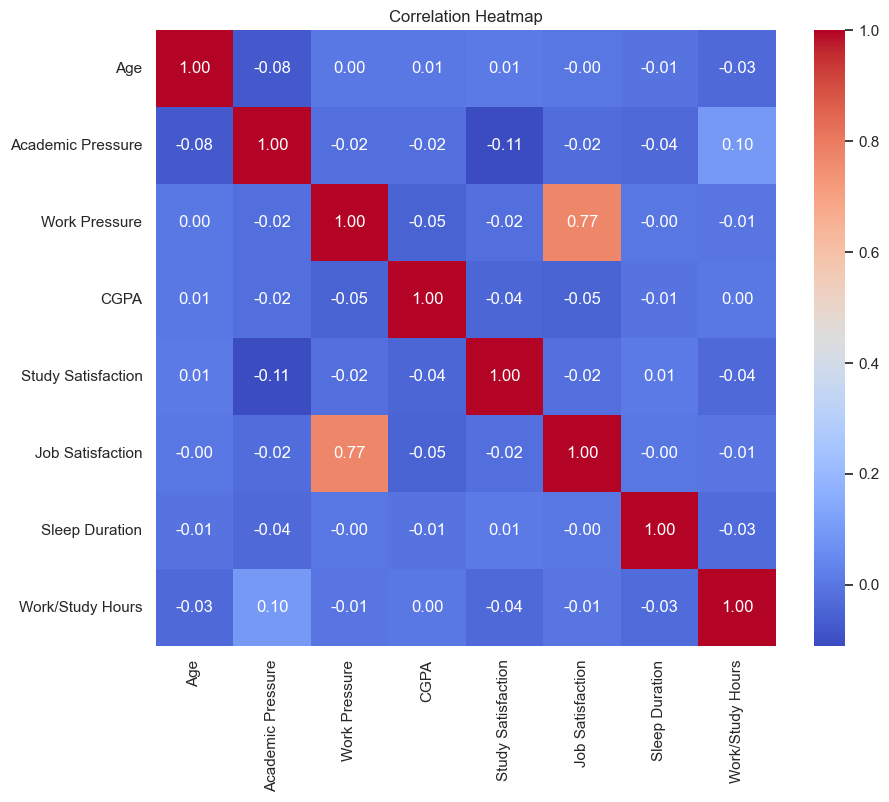

In [36]:
plt.figure(figsize=(10,8))
num_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
            'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours']
corr_matrix = data[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [37]:
fig = px.scatter(data, x="CGPA", y="Study Satisfaction", color="Depression",
                 hover_data=['Age', 'Gender', 'Academic Pressure'],
                 title="CGPA vs Study Satisfaction by Depression")
fig.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.76      2343
           1       0.82      0.85      0.83      3238

    accuracy                           0.80      5581
   macro avg       0.80      0.79      0.80      5581
weighted avg       0.80      0.80      0.80      5581



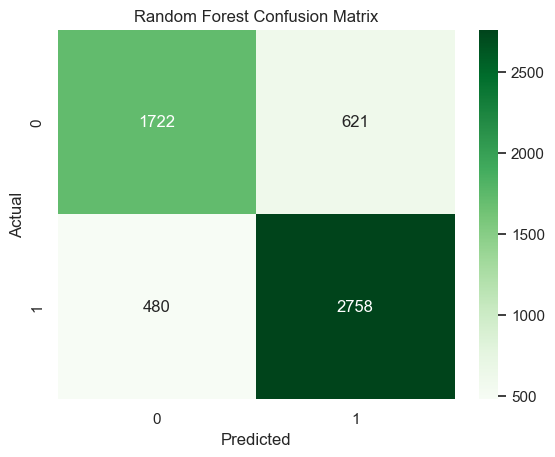

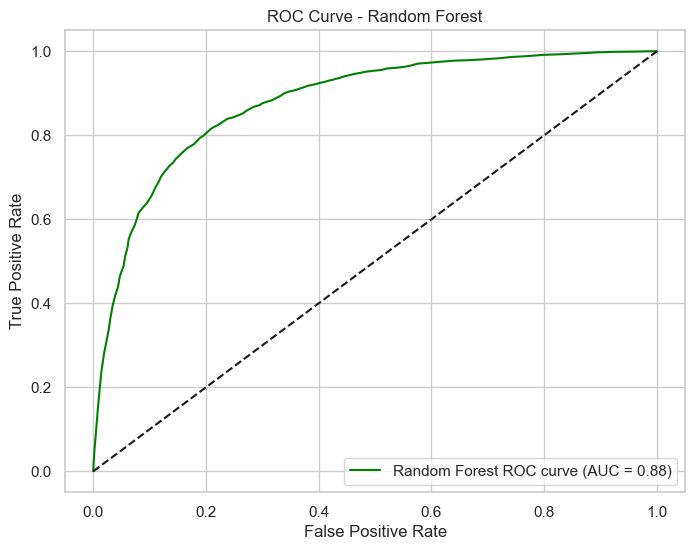

In [40]:
# Prepare features and target
feature_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 
				'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours'] + cat_cols

# Encode categorical variables
data_encoded = data.copy()
for col in cat_cols:
	data_encoded[col] = data_encoded[col].cat.codes

X = data_encoded[feature_cols]
y = data_encoded['Depression']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for RF
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve for RF
y_prob_rf = rf_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest ROC curve (AUC = {roc_auc_rf:.2f})', color='green')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Cross-validation for Logistic Regression
cv_scores_log = cross_val_score(log_model, X, y, cv=5, scoring='accuracy')
print("5-Fold CV Accuracy for Logistic Regression:", cv_scores_log)
print("Mean CV Accuracy:", cv_scores_log.mean())

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("5-Fold CV Accuracy for Random Forest:", cv_scores_rf)
print("Mean CV Accuracy:", cv_scores_rf.mean())

5-Fold CV Accuracy for Logistic Regression: [0.76366243 0.76594982 0.76415771 0.77795699 0.77544803]
Mean CV Accuracy: 0.7694349941782764
5-Fold CV Accuracy for Random Forest: [0.7473571  0.74444444 0.74408602 0.74892473 0.74802867]
Mean CV Accuracy: 0.7465681950858617


Outliers

In [ ]:

# Función para encontrar outliers
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Encontrar outliers en la columna de 'Academic Pressure'
academic_pressure_outliers = find_outliers_iqr(data, 'Academic Pressure')
print(f"Número de outliers en 'Academic Pressure': {len(academic_pressure_outliers)}")
print("Ejemplos de outliers:")
print(academic_pressure_outliers[['Academic Pressure', 'Depression']].head())

# Encontrar outliers en la columna de 'CGPA'
cgpa_outliers = find_outliers_iqr(data, 'CGPA')
print(f"\nNúmero de outliers en 'CGPA': {len(cgpa_outliers)}")
print("Ejemplos de outliers:")
print(cgpa_outliers[['CGPA', 'Depression']].head())

Número de outliers en 'Academic Pressure': 0
Ejemplos de outliers:
Empty DataFrame
Columns: [Academic Pressure, Depression]
Index: []

Número de outliers en 'CGPA': 9
Ejemplos de outliers:
       CGPA  Depression
4365    0.0           0
10407   0.0           0
11489   0.0           1
13909   0.0           1
14855   0.0           0


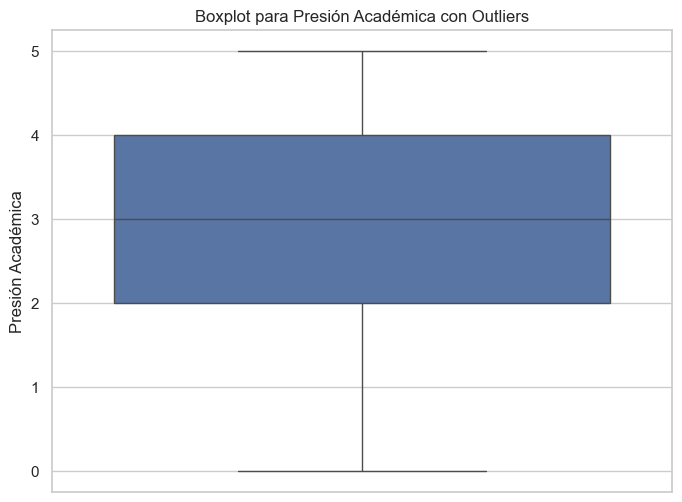

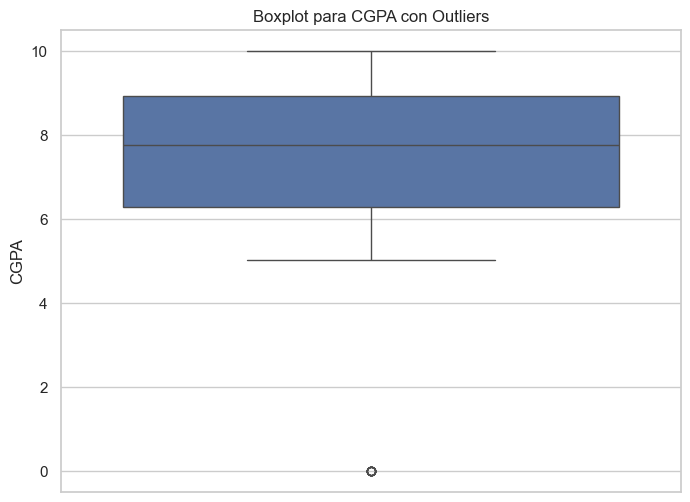

In [ ]:
# Visualizar outliers en 'Academic Pressure'
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Academic Pressure'])
plt.title('Boxplot para Presión Académica con Outliers')
plt.ylabel('Presión Académica')
plt.show()

# Visualizar outliers en 'CGPA'
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['CGPA'])
plt.title('Boxplot para CGPA con Outliers')
plt.ylabel('CGPA')
plt.show()